In [115]:
import numpy as np              
import matplotlib.pyplot as plt 
%matplotlib inline 
import pandas as pd            
import seaborn as sns           
import sklearn     
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import ensemble
from sklearn.metrics import confusion_matrix

In [116]:
url = "https://raw.githubusercontent.com/KirillChizhov33/Machine-Learning/main/heart_disease_uci.csv"
X = pd.read_csv(url)

In [117]:
X.shape

(920, 16)

# 0. В данном датасете приведены некоторые характеристики человека, по которым определяется наличие/отсутствие болезни сердца. Необходимо классифицировать к какому классу num = {0,1,2,3,4} относится человек, где 0 - отсутствие болезни; 1,2,3,4 - стадии болезни сердца

# 1. Данные были прочитаны по ссылке url, расположенной на GitHub

# 2. Визуализация данных и вычисление основных характеристик

In [118]:
X.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [119]:
X.tail()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1


In [120]:
X.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [121]:
X.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


Видно, что в датасете есть пропущенные значения, так же найдены средние значения, например средний возраст равен приблизительно 54 годам. Для каждого количественного признака приведены средние значения, стандартное отклонение, минимальное и макимальное значения, медиана и значения квартилей.

In [122]:
X['sex'].dtype

dtype('O')

In [123]:
X['sex'] = X['sex'].astype('category')
X['dataset'] = X['dataset'].astype('category')
X['cp'] = X['cp'].astype('category')
X['fbs'] = X['fbs'].astype('category')
X['restecg'] = X['restecg'].astype('category')
X['exang'] = X['exang'].astype('category')
X['slope'] = X['slope'].astype('category')
X['thal'] = X['thal'].astype('category')

In [124]:
X.describe(include=['category'])

,sex,dataset,cp,fbs,restecg,exang,slope,thal
count,920,920,920,830,918,865,611,434
unique,2,4,4,2,3,2,3,3
top,Male,Cleveland,asymptomatic,False,normal,False,flat,normal
freq,726,304,496,692,551,528,345,196


Всего 16 признаков из которых 8 - категориальные и 8 - количественные

Посмотрим как зависит признак num от признака age  

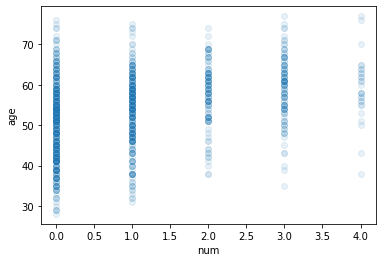

In [125]:
plt.scatter(X['num'], X['age'], alpha=0.1)
plt.xlabel('num')
plt.ylabel('age')
pass

In [126]:
corr_mat = X.corr()
corr_mat

,id,age,trestbps,chol,thalch,oldpeak,ca,num
id,1.000000,0.239301,0.052924,-0.376936,-0.466427,0.049930,0.061433,0.273552
age,0.239301,1.000000,0.244253,-0.086234,-0.365778,0.258243,0.370416,0.339596
trestbps,0.052924,0.244253,1.000000,0.092853,-0.104899,0.161908,0.093705,0.122291
chol,-0.376936,-0.086234,0.092853,1.000000,0.236121,0.047734,0.051606,-0.231547
thalch,-0.466427,-0.365778,-0.104899,0.236121,1.000000,-0.151174,-0.264094,-0.366265
oldpeak,0.049930,0.258243,0.161908,0.047734,-0.151174,1.000000,0.281817,0.443084
ca,0.061433,0.370416,0.093705,0.051606,-0.264094,0.281817,1.000000,0.516216
num,0.273552,0.339596,0.122291,-0.231547,-0.366265,0.443084,0.516216,1.000000


Из корреляционной матрицы видно, что есть умеренная корреляция между признаками age и num

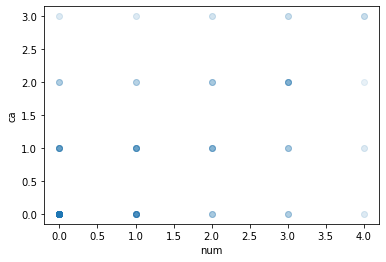

In [127]:
plt.scatter(X['num'], X['ca'], alpha=0.05)
plt.xlabel('num')
plt.ylabel('ca')
pass

Самая сильная корреляция наблюдается между признаками ca и num, Corr(ca, num) ~ 0.52

# 3.Обработка пропущенных значений

Пропущенные значения в таблице представлены значениями NaN. Посмотрим, сколько пропущенных значений в каждом столбце матрицы:

In [128]:
X.isna().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

Заполним пропущенные значения средним или медианой (для количественных признаков) или модой (для номинальных признаков).

Начнём с количественных признаков

In [129]:
X.fillna(X.median(axis = 0), axis=0 , inplace=True) #inplace = True, присвоить значенрие data прямо сейчас

In [130]:
X.isna().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps      0
chol          0
fbs          90
restecg       2
thalch        0
exang        55
oldpeak       0
slope       309
ca            0
thal        486
num           0
dtype: int64

In [131]:
X['sex'].fillna(X['sex'].mode().iloc[0], inplace=True)
X['dataset'].fillna(X['dataset'].mode().iloc[0], inplace=True)
X['cp'].fillna(X['cp'].mode().iloc[0], inplace=True)
X['fbs'].fillna(X['fbs'].mode().iloc[0], inplace=True)
X['restecg'].fillna(X['restecg'].mode().iloc[0], inplace=True)
X['exang'].fillna(X['exang'].mode().iloc[0], inplace=True)
X['slope'].fillna(X['slope'].mode().iloc[0], inplace=True)
X['thal'].fillna(X['thal'].mode().iloc[0], inplace=True)

In [132]:
X.isna().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

Таким образом мы избравились от пропущенных значений

In [133]:
X.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,460.500000,53.510870,131.995652,199.908696,137.692391,0.853261,0.227174,0.995652
std,265.725422,9.424685,18.451300,109.040171,25.145235,1.058049,0.628936,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,177.750000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,267.000000,156.000000,1.500000,0.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


# 4. Обработка категориальных признаков

In [134]:
X.describe(include=['category'])

,sex,dataset,cp,fbs,restecg,exang,slope,thal
count,920,920,920,920,920,920,920,920
unique,2,4,4,2,3,2,3,3
top,Male,Cleveland,asymptomatic,False,normal,False,flat,normal
freq,726,304,496,782,553,583,654,682


Видно что категориальные признаки принимают 2,3 либо 4 значения. Для признаков, принимающих 2 значения одно значение будет = 0, другое = 1. Для признаков, принимающих 3,4 значения применим метод бинаризации

In [135]:
X['sex'] = X['sex'].cat.codes
X['fbs'] = X['fbs'].cat.codes
X['exang'] = X['exang'].cat.codes

In [136]:
X.describe(include=['category'])

,dataset,cp,restecg,slope,thal
count,920,920,920,920,920
unique,4,4,3,3,3
top,Cleveland,asymptomatic,normal,flat,normal
freq,304,496,553,654,682


In [137]:
X.describe()

,id,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,ca,num
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,460.500000,53.510870,0.789130,131.995652,199.908696,0.150000,137.692391,0.366304,0.853261,0.227174,0.995652
std,265.725422,9.424685,0.408148,18.451300,109.040171,0.357266,25.145235,0.482056,1.058049,0.628936,1.142693
min,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,1.000000,120.000000,177.750000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,1.000000,130.000000,223.000000,0.000000,140.000000,0.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,1.000000,140.000000,267.000000,0.000000,156.000000,1.000000,1.500000,0.000000,2.000000
max,920.000000,77.000000,1.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,3.000000,4.000000


Можем убедиться что 3 категориальных признака, принимающих 2 значения стали количественными. Например видно, что примерно 79% - мужчины, 21% - женщины

In [138]:
dataset_dummies = pd.get_dummies(X['dataset'])

In [139]:
dataset_dummies.head()

,Cleveland,Hungary,Switzerland,VA Long Beach
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [140]:
cp_dummies = pd.get_dummies(X['cp'])
restecg_dummies = pd.get_dummies(X['restecg'])
slope_dummies = pd.get_dummies(X['slope'])
thal_dummies = pd.get_dummies(X['thal'])

In [141]:
X = pd.concat((X, dataset_dummies), axis=1)
X = pd.concat((X, cp_dummies), axis=1)
X = pd.concat((X, pd.get_dummies(X['restecg'])
), axis=1)
X = pd.concat((X, slope_dummies), axis=1)
X = pd.concat((X, thal_dummies), axis=1)

X = X.drop(['dataset'], axis=1)
X = X.drop(['cp'], axis=1)
X = X.drop(['restecg'], axis=1)
X = X.drop(['slope'], axis=1)
X = X.drop(['thal'], axis=1)

In [142]:
X.head()

,id,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,ca,...,typical angina,lv hypertrophy,normal,st-t abnormality,downsloping,flat,upsloping,fixed defect,normal,reversable defect
0,1,63,1,145.0,233.0,1,150.0,0,2.3,0.0,...,1,1,0,0,1,0,0,1,0,0
1,2,67,1,160.0,286.0,0,108.0,1,1.5,3.0,...,0,1,0,0,0,1,0,0,1,0
2,3,67,1,120.0,229.0,0,129.0,1,2.6,2.0,...,0,1,0,0,0,1,0,0,0,1
3,4,37,1,130.0,250.0,0,187.0,0,3.5,0.0,...,0,0,1,0,1,0,0,0,1,0
4,5,41,0,130.0,204.0,0,172.0,0,1.4,0.0,...,0,1,0,0,0,0,1,0,1,0


In [143]:
X.shape

(920, 28)

Признаков стало больше, а именно 28, при начальных 16. Но есть и плюсы, они все количественные

# 5. Нормализация количественных признаков

In [144]:
X_stand = (X - X.mean(axis = 0))/X.std(axis = 0)
X_stand.describe()

,id,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,ca,...,typical angina,lv hypertrophy,normal,st-t abnormality,downsloping,flat,upsloping,fixed defect,normal,reversable defect
count,9.200000e+02,9.200000e+02,9.200000e+02,9.200000e+02,9.200000e+02,9.200000e+02,9.200000e+02,9.200000e+02,9.200000e+02,9.200000e+02,...,9.200000e+02,9.200000e+02,9.200000e+02,9.200000e+02,9.200000e+02,9.200000e+02,9.200000e+02,9.200000e+02,9.200000e+02,9.200000e+02
mean,-6.347579e-17,1.320200e-16,-8.630777e-16,-1.255035e-17,1.305719e-15,-1.285626e-15,-1.170320e-15,7.508487e-16,-8.169793e-17,3.634170e-15,...,7.958610e-17,-3.590365e-15,-6.289655e-16,-2.331589e-15,5.049101e-16,1.483837e-15,-1.646992e-15,-8.417180e-17,-1.151253e-16,-4.991177e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.729229e+00,-2.706814e+00,-1.933443e+00,-7.153732e+00,-1.833349e+00,-4.198557e-01,-3.089746e+00,-7.598791e-01,-3.263801e+00,-3.612033e-01,...,-2.292910e-01,-5.065091e-01,-1.226855e+00,-4.912259e-01,-2.709840e-01,-1.567155e+00,-5.318048e-01,-2.292910e-01,-1.691872e+00,-5.132734e-01
25%,-8.646143e-01,-6.908315e-01,5.166500e-01,-6.501250e-01,-2.032159e-01,-4.198557e-01,-7.036081e-01,-7.598791e-01,-8.064476e-01,-3.612033e-01,...,-2.292910e-01,-5.065091e-01,-1.226855e+00,-4.912259e-01,-2.709840e-01,-1.567155e+00,-5.318048e-01,-2.292910e-01,-1.691872e+00,-5.132734e-01
50%,0.000000e+00,5.189886e-02,5.166500e-01,-1.081578e-01,2.117688e-01,-4.198557e-01,9.177121e-02,-7.598791e-01,-3.338796e-01,-3.612033e-01,...,-2.292910e-01,-5.065091e-01,8.142060e-01,-4.912259e-01,-2.709840e-01,6.374055e-01,-5.318048e-01,-2.292910e-01,5.904187e-01,-5.132734e-01
75%,8.646143e-01,6.885249e-01,5.166500e-01,4.338094e-01,6.152898e-01,-4.198557e-01,7.280747e-01,1.314568e+00,6.112565e-01,-3.612033e-01,...,-2.292910e-01,-5.065091e-01,8.142060e-01,-4.912259e-01,-2.709840e-01,6.374055e-01,-5.318048e-01,-2.292910e-01,5.904187e-01,-5.132734e-01
max,1.729229e+00,2.492299e+00,5.166500e-01,3.685613e+00,3.696723e+00,2.379182e+00,2.557447e+00,1.314568e+00,5.053396e+00,4.408754e+00,...,4.356529e+00,1.972152e+00,8.142060e-01,2.033511e+00,3.686243e+00,6.374055e-01,1.878345e+00,4.356529e+00,5.904187e-01,1.946162e+00


Отбор признаков

In [145]:
X_stand.columns

Index(['id', 'age', 'sex', 'trestbps', 'chol', 'fbs', 'thalch', 'exang',
       'oldpeak', 'ca', 'num', 'Cleveland', 'Hungary', 'Switzerland',
       'VA Long Beach', 'asymptomatic', 'atypical angina', 'non-anginal',
       'typical angina', 'lv hypertrophy', 'normal', 'st-t abnormality',
       'downsloping', 'flat', 'upsloping', 'fixed defect', 'normal',
       'reversable defect'],
      dtype='object')

Уберём признак id, который впринципе бесполезен

In [146]:
Z = X_stand.drop(['num', 'id'], axis=1)
y = X['num']
Z.shape

(920, 26)

# 6.Разбиение данных на выборки

Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [147]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Z, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(690, 230)

# 7.Классификатор ближайших соседей

Метод k ближайших соседей kNN:

In [148]:
from sklearn.neighbors import KNeighborsClassifier

Text(0, 0.5, 'error')

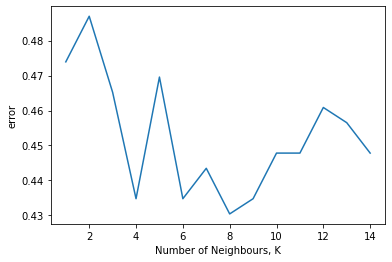

In [149]:
errors=[]
K=np.arange(1,15)
for k in K:
    model= KNeighborsClassifier(k)
    model.fit(X_train,y_train)
    pred= model.predict(X_test)
    error= np.mean(pred!=y_test)
    errors.append(error)

plt.plot(K,errors)
plt.xlabel('Number of Neighbours, K')
plt.ylabel('error')

Наименьшая ошибка при k=8

In [150]:
model= KNeighborsClassifier(8)
model.fit(X_train,y_train)
pred= model.predict(X_test)
error= np.mean(pred!=y_test)
print(error)

0.43043478260869567


In [151]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [152]:
y_train != y_train_pred

695    False
521    False
7      False
250     True
155    False
       ...  
106     True
270    False
860    False
435    False
102    False
Name: num, Length: 690, dtype: bool

In [153]:
y_test != y_test_pred

319    False
377    False
538    False
296     True
531     True
       ...  
59     False
657     True
299     True
819     True
261     True
Name: num, Length: 230, dtype: bool

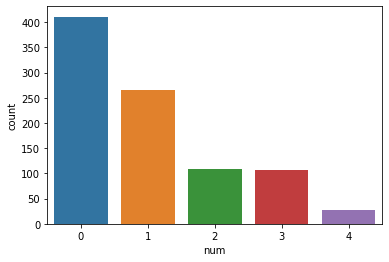

In [154]:
sns.countplot(x='num', data=X)
pass

# 8. Ошибки на тестовой и обучающей выборках

In [155]:
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.34492753623188405, 0.43043478260869567)

Ошибка при k = 8 на обучающей выборке ~ 34%, на тестовой выборке ~ 43%

Такая большая ошибка может наблюдаться в следствии того, что было очень много пропущенных значений, которые мы заменили медианой для количественных признаков и модой для категориальных признаков.

In [156]:
print(confusion_matrix(y_test,model.predict(X_test),normalize='true'))

[[0.89583333 0.07291667 0.02083333 0.01041667 0.        ]
 [0.328125   0.453125   0.125      0.09375    0.        ]
 [0.09677419 0.4516129  0.32258065 0.12903226 0.        ]
 [0.3125     0.375      0.125      0.1875     0.        ]
 [0.14285714 0.14285714 0.71428571 0.         0.        ]]


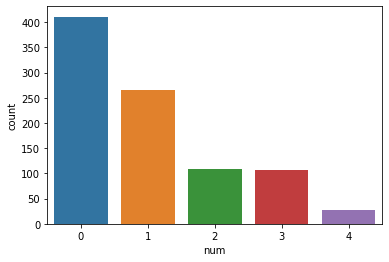

In [157]:
sns.countplot(x='num', data=X)
pass

Метод опорных векторов

In [158]:
svc = SVC(gamma = 'auto')
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print('Ошибка на train: ', err_train)
print('Ошибка на test: ', err_test)


Ошибка на train:  0.25072463768115943
Ошибка на test:  0.4782608695652174


Случайный лес

In [160]:
rf = ensemble.RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print('Ошибка на train: ', err_train)
print('Ошибка на test: ', err_test)

Ошибка на train:  0.0
Ошибка на test:  0.41304347826086957


Метод главных компонент

In [161]:
new_data = pd.DataFrame(data = X)
corr_mat = new_data.corr()
corr_mat.where(np.triu(corr_mat > 0.4, k=1)).stack().sort_values(ascending = False)

id         VA Long Beach     0.714421
Cleveland  lv hypertrophy    0.497895
ca         Cleveland         0.485038
exang      asymptomatic      0.426861
num        asymptomatic      0.424172
Cleveland  upsloping         0.417504
oldpeak    num               0.411588
dtype: float64

Объясненная дисперсия не меньше 99%

In [162]:
from sklearn.decomposition import PCA
pca_model = PCA(n_components = 0.90) 
pca_model.fit(X)
X_proj = pca_model.transform(X)
print(X.shape)
print(X_proj.shape)

(920, 28)
(920, 2)


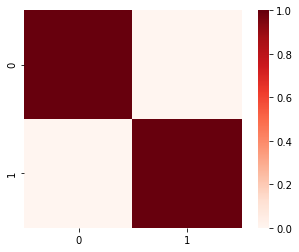

In [163]:
new_X = pd.DataFrame(data = X_proj)
corr_mat = new_X.corr()
sns.heatmap(corr_mat, square = True, cmap = 'Reds')
pass